__IMPORT LIBRARY__

In [5]:
import csv
import sys
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy

__PLOTING DATAAA__

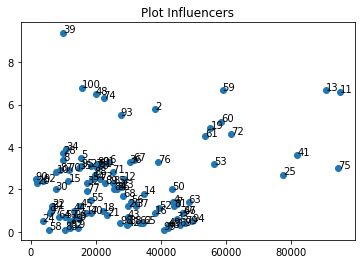

In [6]:
influencers = pd.read_csv("influencers.csv") #turn in data .csv to make a plot
fig, ax = plt.subplots()
ax.scatter(influencers["followerCount"], influencers["engagementRate"]) #coloumn names 
for i, txt in enumerate(influencers["id"]):
    ax.annotate(txt, (influencers["followerCount"][i], influencers["engagementRate"][i]))
plt.title('Plot Influencers')
plt.show()

__FUZZIFICATION YOYOY__

In [7]:
# fuzzification for Followers Count (using trapezium diagram)
# with a=0 b=19023 c=38407 d=57070 e=76904 f=95117
def followersCount(x):
    low = 0 
    avg = 0
    high = 0
    
    if (x <= 19023): #jika nilai x berada di grafik kurang dari sama dengan 19023
        low = 1
    elif(19023 <= x <= 38047): #jika nilai x berada diantara grafik turun low dan naik avg 
        low = ((x - 19023) / (38047 - 19023))
        avg = ((38047 - x) / (38407 - 19023))
    elif(38047 <= x <= 57070): #jika nilai x berada di grafik medium
        avg = 1
    elif(57070 <= x <= 76094): #jika nilai x berada diantara grafik turun avg dan naik high
        avg = ((x - 57070) / (76094 - 57070))
        high = ((76094 - x) / (76094 - 19023))
    elif (x >= 76904):
        high = 1
    return low, avg, high

In [8]:
# print(followersCount(21126))

In [9]:
# fuzzification for Engagement Rate (using trapezium diagram)
# with a=0 b=0.1 c=1.7 d=3.4 e=5.1 f=6.8
def engagementRate(y):
    bottom = 0
    middle = 0 
    upper = 0
    if (y <= 0.1): #jika nilai y berada di grafik kurang dari sama dengan 0.1
        bottom = 1
    elif (0.1 <= y <= 1.7): #jika nilai y berada diantara grafik turun bottom dan naik middle
        bottom = ((y - 0.1) / (1.7 - 0.1))
        middle = ((1.7 - y) / (1.7 - 0.1))
    elif (1,7 <= y <= 3.4): #jika nilai y berada di grafik medium
        middle = 1
    elif (3.4 <= x <= 5.1): #jika nilai y berada di antara grafik turun middle dan naik upper
        middle = ((y - 3.4) / (5.1 - 3.4))
        upper = ((5.1 - y) / (5.1 - 3.4)) 
    elif (y >= 5.1): 
        upper = 1
    return bottom, middle, upper

In [10]:
# print(engagementRate(0.8))

__INFERENCE__

In [11]:
#nentuin datanya patut tak buat di acc, consider, or rejected.
def inference(lowF, avgF, highF, bottomE, middleE, upperE):
    rule = [[min(lowF, upperE), 'acc'], [min(avgF, upperE), 'acc'], [min(highF, middleE),'acc'], [min(highF, upperE), 'acc'],
           [min(avgF, middleE), 'cons'], [min(highF, bottomE), 'cons'], [min(lowF, bottomE), 'cons'],
           [min(avgF, bottomE), 'reject'], [min(lowF, middleE), 'reject']]
            
    acc = []
    cons = []
    reject = []
    
    for i in range(len(rule)):
        if rule[i][1] == 'acc':
            acc.append(rule[i][0])
        elif rule[i][1] == 'cons':
            cons.append(rule[i][0])
        elif rule[i][1] == 'reject':
            reject.append(rule[i][0])
    return max(acc), max(cons), max(reject)

In [12]:
# print(lowF, avgF, highF, bottomE, middleE, upperE)

__DEFUZZIFICATION USING SUGENO__

In [13]:
#menentukan nilai defuzzifikasi
def defuzzification(accept, consider, rejected):

    nacc = 100
    ncons = 75
    nreject = 50
    hasilDef = ((accept * nacc) + (consider * ncons) + (rejected * nreject)) / (accept+consider+rejected)
    return hasilDef

__GET ELEMENT__

In [14]:
# memanggil elemen agar bisa masuk ke csv file
def getElm(who):
    return who[1]

__MAIN PROGRAM__

In [16]:
data = []
result = []
with open('influencers.csv', mode='r') as csv_input:
    spamreader = csv.reader(csv_input)
    next(spamreader, None)
    
    for row in spamreader:
        data.append([int(row[0]),float(row[1]),float(row[2])])
    
    for i in range(len(data)):
        lowF, avgF, highF = followersCount(data[i][1])
        bottomE, middleE, upperE = engagementRate(data[i][2])
        a,b,c = inference(lowF, avgF, highF, bottomE, middleE, upperE)
        hasil = defuzzification(a,b,c)
        #print(a,b,c)
        result.append([i+1, hasil])
    # sorting
    result = sorted(result,key=lambda x:x[1],reverse=True)
    print(result)
    
    resultFinal = []
    #memilih 20 orang utk dimasukin ke csv.
    for i in range(0, 20):
        resultFinal.append(result[i][0])
    print(resultFinal)
    numpy.savetxt('chosen.csv', resultFinal, delimiter=',', fmt='%s')


[[11, 100.0], [13, 100.0], [25, 100.0], [41, 100.0], [75, 100.0], [60, 95.39079892903467], [59, 93.71016210409289], [72, 88.16567259164782], [2, 75.0], [19, 75.0], [50, 75.0], [53, 75.0], [58, 75.0], [61, 75.0], [76, 75.0], [83, 75.0], [88, 74.22516676027442], [48, 73.79330702601092], [46, 73.4375], [78, 73.39111138674726], [80, 73.15071064064445], [51, 72.18996672828897], [73, 72.06997028988444], [49, 71.875], [55, 71.875], [69, 71.875], [91, 70.89247704211007], [74, 70.50132464163913], [79, 70.3125], [89, 69.9602075197204], [94, 68.75], [6, 68.30235119817895], [22, 67.1875], [33, 67.1875], [37, 67.1875], [45, 67.1875], [71, 66.83243240060466], [85, 66.58643723024846], [84, 66.10264624717257], [56, 65.76989536963977], [31, 65.625], [86, 65.04243924440233], [26, 64.552520891311], [1, 64.0625], [21, 64.0625], [44, 64.0625], [98, 63.85352484814696], [93, 63.537540280990434], [23, 63.19802366438754], [16, 62.50000000000001], [17, 62.50000000000001], [40, 62.50000000000001], [47, 62.500000